Andreev spectrum of nanostructure-based junction

# import Kwant

In [1]:
import kwant
print(kwant.version.version)

import matplotlib.pyplot as plt
#plt.style.use('genstyle')

import pandas as pd

1.4.1


# System creation

In [2]:
import numpy as np

# shape of system
def get_shape(L, W, H):
    def shape(site):
        (x, y, z) = site.pos
        return (0 <= x <= L and 0 <= y <= W and 0 <= z <= H)
    return shape, np.array([0, 0, 0])

# shape of leads
def get_shape_lead_0(L, W, H):
    def shape(site):
        (x, y, z) = site.pos
        return (0 <= y <= W and 0 <= z <= H)
    return shape, np.array([0, 0, 0])

def get_shape_lead_1(L, W, H):
    def shape(site):
        (x, y, z) = site.pos
        return (0 <= y <= W and 0 <= z <= H)
    return shape, np.array([L, 0, 0])

L_x = 100
W_y = 100
H_z = 100

## 3DTI hamiltonian

In [7]:
import kwant.continuum


norbs = 8 # 8 orbitals (2 for particle-hole x 2 for spin up-down x 2 for orbitals A/B)
ham_TI = ("- {mu} * kron(sigma_z, sigma_0, sigma_0) + "
          "{epsilon} * kron(sigma_z, sigma_0, sigma_0) + "
          "{M} * kron(sigma_z, sigma_0, sigma_z) - "
          "A_perp * k_x * kron(sigma_z, sigma_y, sigma_x) + "
          "A_perp * k_y * kron(sigma_0, sigma_x, sigma_x) + "
          "A_z * k_z * kron(sigma_z, sigma_0, sigma_y) + "
          "m_z * kron(sigma_z, sigma_z, sigma_0)")



epsilon = "(C_0 - C_perp * (k_x**2 + k_y**2) - C_z * k_z**2)"
M = "(M_0 - M_perp * (k_x**2 + k_y**2) - M_z * k_z**2)"

ham_TI = ham_TI.format(mu = "mu_bulk", epsilon=epsilon, M=M)
ham_TI = ham_TI.format(C_0="C_0")
ham_discr, coords = kwant.continuum.discretize_symbolic(ham_TI)


ham_TI_lead1 = ham_TI.format(mu = "mu_lead1", epsilon=epsilon, M=M)
ham_TI_lead1 = ham_TI.format(C_0="C_0")
ham_discr_lead1, coords = kwant.continuum.discretize_symbolic(ham_TI_lead1)

ham_TI_lead2 = ham_TI.format(mu = "mu_lead2", epsilon=epsilon, M=M)
ham_TI_lead2 = ham_TI.format(C_0="C_0")
ham_discr_lead2, coords = kwant.continuum.discretize_symbolic(ham_TI_lead2)

print(ham_discr)

#SC_complex = ("- re({Delta}) * kron(sigma_y, sigma_y) -"
#              "im({Delta}) * kron(sigma_x, sigma_y)")
#
#SC_final = SC_complex.format(Delta="Deltaf(y, z)")
#ham_TI_SC = ham_TI + SC_final # 3D TI BdG Hamiltonian with superconducting pairing potential

{(0, 0, 0): Matrix([
[C_0 - 2*C_perp/a_y**2 - 2*C_perp/a_x**2 - 2*C_z/a_z**2 + M_0 - 2*M_perp/a_y**2 - 2*M_perp/a_x**2 - 2*M_z/a_z**2 + m_z - mu_bulk,                                                                                                                               0,                                                                                                                               0,                                                                                                                               0,                                                                                                                                0,                                                                                                                                0,                                                                                                                                0,                                                                         

In [8]:
a = 10
ti_syst = kwant.continuum.build_discretized(ham_discr, coords, grid=a)
ti_lead_0 = kwant.continuum.build_discretized(ham_discr_lead1, coords, grid=a)
ti_lead_1 = kwant.continuum.build_discretized(ham_discr_lead2, coords, grid=a)
print(ti_syst)

# Discrete coordinates: x y z

# Onsite element:
_cache_0 = (
array([[ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
         0.+0.j],
       [ 0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
         0.+0.j],
       [ 0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
         0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
         0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j,  0.+0.j,  0.+0.j,
         0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j,  0.+0.j,
         0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j,
         0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
        -1.+0.j]]))
_cache_1 = (
array([[-0.04+0.j,  0.  +0.j,  0.  +0.j,  0.  +0.j,  0.  +0.j,  0.  +0.j,
         0.  +0.j,  0.  +0.j],
       [ 0.  +0.j, -0.04+0.j,  0.  +0.j,  0.  +0.j,  0.  +0.j,  0.  +0.j,
         0.  +0.j,  0.  +0.j],
 

In [9]:
syst1 = kwant.Builder()
_ = syst1.fill(ti_syst, *get_shape(L_x, W_y, H_z))

lat = kwant.lattice.cubic(a, norbs=norbs)

In [10]:
sigma_0 = np.identity(2)
sigma_x = np.array([[0, 1], [1, 0]])
sigma_z = np.array([[1, 0], [0, -1]])
conservation_law = -np.kron(sigma_z, np.kron(sigma_0, sigma_0))
particle_hole = np.kron(sigma_x, np.kron(sigma_0, sigma_0))
sigma_TR = np.array([[0, -1], [1, 0]])
# i*sigma_y
time_reversal = np.kron(sigma_z, np.kron(sigma_TR, sigma_0))

nleads = 2

lead_0 = kwant.Builder(kwant.TranslationalSymmetry((-a, 0, 0)),
                       conservation_law=conservation_law,
                       particle_hole=particle_hole,
                       time_reversal=time_reversal
                      )
lead_1 = kwant.Builder(kwant.TranslationalSymmetry((a, 0, 0)),
                       conservation_law=conservation_law,
                       particle_hole=particle_hole,
                       time_reversal=time_reversal
                      )

lead_0.fill(ti_lead_0, *get_shape_lead_0(L_x, W_y, H_z))
lead_1.fill(ti_lead_1, *get_shape_lead_0(L_x, W_y, H_z))

syst1.attach_lead(lead_0)
syst1.attach_lead(lead_1)

[]

/Users/afasjasd/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


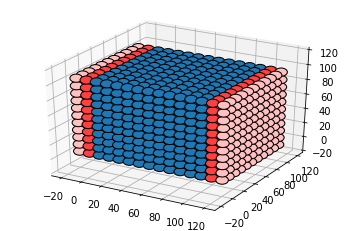

In [13]:
#kwant.plotter.set_engine("matplotlib")
fig = kwant.plot(syst1, show=False)
# fig.update_layout(scene_aspectmode='data')
fig.show()

In [12]:
systf1 = syst1.finalized()

## Metal Hamiltonian

In [14]:
import kwant.continuum

norbs = 4 # 4 orbitals (2 for particle-hole x 2 for spin up-down)
ham = ("- mu * kron(sigma_z, sigma_0) + "
       "C_0 * kron(sigma_z, sigma_0) + "
       "C_2 * (k_x**2 + k_y**2 + k_z**2) * kron(sigma_z, sigma_0)")

ham_lead1 = ("- mu_lead1 * kron(sigma_z, sigma_0) + "
       "C_0 * kron(sigma_z, sigma_0) + "
       "C_2 * (k_x**2 + k_y**2 + k_z**2) * kron(sigma_z, sigma_0)")

ham_lead2 = ("- mu_lead2 * kron(sigma_z, sigma_0) + "
       "C_0 * kron(sigma_z, sigma_0) + "
       "C_2 * (k_x**2 + k_y**2 + k_z**2) * kron(sigma_z, sigma_0)")

ham_metal, coords = kwant.continuum.discretize_symbolic(ham)
ham_metal_lead1, coords = kwant.continuum.discretize_symbolic(ham_lead1)
ham_metal_lead2, coords = kwant.continuum.discretize_symbolic(ham_lead2)

In [15]:
a = 10
temp_syst = kwant.continuum.build_discretized(ham_metal, coords, grid=a)
temp_lead_0 = kwant.continuum.build_discretized(ham_metal_lead1, coords, grid=a)
temp_lead_1 = kwant.continuum.build_discretized(ham_metal_lead2, coords, grid=a)

In [16]:
syst2 = kwant.Builder()
_ = syst2.fill(temp_syst, *get_shape(L_x, W_y, H_z))

lat = kwant.lattice.cubic(a, norbs=norbs)

In [17]:
sigma_0 = np.identity(2)
sigma_x = np.array([[0, 1], [1, 0]])
sigma_z = np.array([[1, 0], [0, -1]])
sigma_TR = np.array([[0, -1], [1, 0]])
conservation_law = -np.kron(sigma_z, sigma_0)
particle_hole = np.kron(sigma_x, sigma_0)
time_reversal = np.kron(sigma_z, sigma_TR)

nleads = 2

lead_0 = kwant.Builder(kwant.TranslationalSymmetry((-a, 0, 0)),
                       conservation_law=conservation_law,
                       particle_hole=particle_hole,
                       time_reversal=time_reversal
                      )
lead_1 = kwant.Builder(kwant.TranslationalSymmetry((a, 0, 0)),
                       conservation_law=conservation_law,
                       particle_hole=particle_hole,
                       time_reversal=time_reversal
                      )

lead_0.fill(temp_lead_0, *get_shape_lead_0(L_x, W_y, H_z))
lead_1.fill(temp_lead_1, *get_shape_lead_0(L_x, W_y, H_z))

syst2.attach_lead(lead_0)
syst2.attach_lead(lead_1)

[]

/Users/afasjasd/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


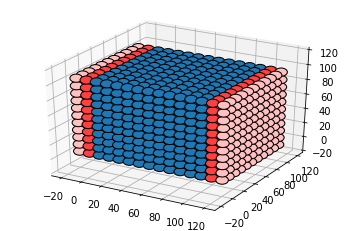

In [19]:
#kwant.plotter.set_engine("matplotlib")
fig = kwant.plot(syst2, show=False)
# fig.update_layout(scene_aspectmode='data')
fig.show()

In [20]:
systf2 = syst2.finalized()

## model parameters

In [31]:
#params_toy = dict(C_0=0.0,
#                  C_2=3.0,
#                  mu=0.012
#                 )

params_toy = dict(C_0=0.0,
                  C_2=3.0,
                  mu=0.012,
                  mu_lead1=0.014,
                  mu_lead2=0.012
                 )

#params_TI = dict(A_perp=3.0,
#                 A_z=3.0,
#                 M_0=0.3,
#                 M_perp=15.0,
#                 M_z=15.0,
#                 C_0=0.0,
#                 C_perp=0.0,
#                 C_z=0.0,
#                 m_z=0.0,
#                 mu=0.1
#                )

params_TI = dict(A_perp=3.0,
                 A_z=3.0,
                 M_0=0.3,
                 M_perp=15.0,
                 M_z=15.0,
                 C_0=0.0,
                 C_perp=0.0,
                 C_z=0.0,
                 m_z=0.0,
                 mu_bulk=0.05,
                 mu_lead1=0.1,
                 mu_lead2=0.1
                )

## Band structure

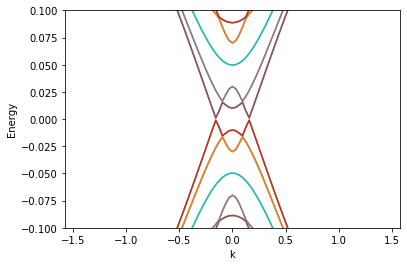

In [24]:
import matplotlib.pyplot as plt

momenta = np.linspace(-0.5*np.pi, 0.5*np.pi, 101)

params_bands_plot = params_TI.copy()
kwant.plotter.bands(systf1.leads[0], params=params_bands_plot, show=False, momenta=momenta)
plt.xlim(-0.5*np.pi, 0.5*np.pi)
#plt.ylim(-1,1)
plt.ylim(-0.1, 0.1)
plt.show()

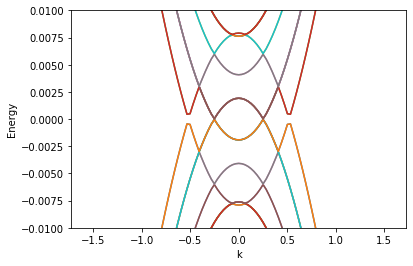

In [26]:
import matplotlib.pyplot as plt

momenta = np.linspace(-0.5*np.pi, 0.5*np.pi, 101)

params_bands_plot = params_toy.copy()
kwant.plotter.bands(systf2.leads[0], params=params_bands_plot, show=False, momenta=momenta)
#plt.xlim(-0.05*np.pi, 0.05*np.pi)
#plt.ylim(-1,1)
plt.ylim(-0.01, 0.01)
plt.show()

# Andreev spectrum

## Add in phase-dependence

In [53]:
def reverse(arr):
    m = len(arr)
    n = len(arr[0])
    l = np.array(list(arr))
    i = 0
    while i < m:
        j = 0
        while j < n:
            l[i][j] = arr[m-i-1][n-j-1]
            j+=1
        i+=1
    return l

pd.options.display.float_format = "{:,.2f}".format

In [27]:
def energy_operator_mask(syst, p, ph_sym=False, phases=np.zeros(nleads)):
    """Returns the operator of Eq. (9) of paper.
    
    Parameters:
    -----------
    syst : kwant.builder.InfiniteSystem object
        The finalized system.
    p : types.SimpleNamespace object
        A simple container that is used to store Hamiltonian parameters.
    
    Returns:
    --------
    operator : numpy array
        Operator in Eq. (9)."""
    smat = kwant.smatrix(syst, params=p)
    #print(smat.submatrix(0, 0))
    #print(smat.submatrix(1, 1))
    size_L = smat.submatrix((0, 0), (0, 0)).shape[0]
    size_R = smat.submatrix((1, 0), (1, 0)).shape[0]
    mask_e = np.zeros((2*size_L+2*size_R, 2*size_L+2*size_R), dtype=bool)
    mask_h = np.zeros((2*size_L+2*size_R, 2*size_L+2*size_R), dtype=bool)

    mask_e[:size_L, :size_L] = True
    mask_h[size_L:2*size_L, size_L:2*size_L] = True
    mask_e[:size_L, 2*size_L:2*size_L+size_R] = True
    mask_e[2*size_L:2*size_L+size_R,:size_L] = True
    mask_h[size_L:2*size_L, 2*size_L+size_R:2*size_L+2*size_R] = True
    mask_h[2*size_L+size_R:2*size_L+2*size_R,size_L:2*size_L] = True
    mask_e[2*size_L:2*size_L+size_R,2*size_L:2*size_L+size_R] = True
    mask_h[2*size_L+size_R:2*size_L+2*size_R,2*size_L+size_R:2*size_L+2*size_R] = True
    
    smat_e = smat.data[mask_e].reshape((size_L+size_R,size_L+size_R))
    smat_h = smat.data[mask_h].reshape((size_L+size_R,size_L+size_R))
    #smat_h = reverse(smat_h)
    
    smat_h_copy = np.array(list(smat_h))
    
    i = 0
    for a in smat_h:
        j = 0
        for b in smat_h[0]:
            if i < size_L:
                new_i = size_L - 1 - i
            else:
                new_i = 3*size_L - 1 - i
            if j < size_R: 
                new_j = size_R - 1 - j
            else:
                new_j = 3*size_R - 1 - j
            smat_h[new_i][new_j] = smat_h_copy[i][j]
            j+=1
        i+=1
        
    
## Not sure this is right
    mat_phase_1 = np.identity(size_L)*np.exp(1j*phases[0])
    mat_phase_2 = np.identity(size_R)*np.exp(1j*phases[1])
    mat_phase = np.block([
        [mat_phase_1, np.zeros((size_L, size_R))],
        [np.zeros((size_R, size_L)), mat_phase_2]
    ])

    
    if ph_sym == False:
        smat_prod = smat_e.T.conj() @ mat_phase @ smat_h.T.conj() @ mat_phase.conj()
        #print(smat_prod)
    else:
        smat_prod = smat_e.T.conj() @ mat_phase @ smat_e.T @ mat_phase.conj()
        #print(smat_prod)
    return [smat_e, smat_h, 0.5 * np.eye(smat_prod.shape[0]) - 0.25 * (smat_prod + smat_prod.T.conj())]

def energy_operator_block(syst, p, ph_sym=False, phases=np.zeros(nleads)):
    """Returns the operator of Eq. (9) of paper.
    
    Parameters:
    -----------
    syst : kwant.builder.InfiniteSystem object
        The finalized system.
    p : types.SimpleNamespace object
        A simple container that is used to store Hamiltonian parameters.
    
    Returns:
    --------
    operator : numpy array
        Operator in Eq. (9)."""
    smat = kwant.smatrix(syst, params=p)
    size_L = int(smat.num_propagating(0)/2)
    size_R = int(smat.num_propagating(1)/2)
    smat_e = np.block([[smat.submatrix((0,0),(0,0)), smat.submatrix((1,0),(0,0))],
         [smat.submatrix((0,0),(1,0)), smat.submatrix((1,0),(1,0))]])
    smat_h = np.block([[smat.submatrix((0,1),(0,1)), smat.submatrix((1,1),(0,1))],
         [smat.submatrix((0,1),(1,1)), smat.submatrix((1,1),(1,1))]])
    
    smat_h_copy = np.array(list(smat_h))
    
    
    i = 0
    for a in smat_h:
        j = 0
        for b in smat_h[0]:
            if i < size_L:
                new_i = size_L - 1 - i
            else:
                new_i = 3*size_L - 1 - i
            if j < size_R: 
                new_j = size_R - 1 - j
            else:
                new_j = 3*size_R - 1 - j
            smat_h[new_i][new_j] = smat_h_copy[i][j]
            j+=1
        i+=1

    
## Not sure this is right
    mat_phase_1 = np.identity(size_L)*np.exp(1j*phases[0])
    mat_phase_2 = np.identity(size_R)*np.exp(1j*phases[1])
    mat_phase = np.block([
        [mat_phase_1, np.zeros((size_L, size_R))],
        [np.zeros((size_R, size_L)), mat_phase_2]
    ])

    
    if ph_sym == False:
        smat_prod = smat_e.T.conj() @ mat_phase @ smat_h.T.conj() @ mat_phase.conj()
        #print(smat_prod)
    else:
        smat_prod = smat_e.T.conj() @ mat_phase @ smat_e.T @ mat_phase.conj()
        #print(smat_prod)
    return [smat_e, smat_h, 0.5 * np.eye(smat_prod.shape[0]) - 0.25 * (smat_prod + smat_prod.T.conj())]


def e_squared_over_delta(syst, p, ph_sym=False, phases=np.zeros(nleads), method='mask'):
    if method == 'mask':
        operator = energy_operator_mask(syst, p, ph_sym, phases)
    elif method == 'block':
        operator = energy_operator_block(syst, p, ph_sym, phases)
    return np.linalg.eigvalsh(operator[2])

def energies_over_delta(syst, p, ph_sym=False, phases=np.zeros(nleads)):
    """Same as energy_operator(), but returns the 
    square-root of the eigenvalues"""
    if method == 'mask':
        operator = energy_operator_mask(syst, p, ph_sym, phases)
    elif method == 'block':
        operator = energy_operator_block(syst, p, ph_sym, phases)
    return np.sqrt(np.linalg.eigvalsh(operator[2]))

def plot_ABS_spectrum(syst, p, phases, n=3, ph_sym=False, method='mask', r=False):
    params = p.copy()
    sol_list1 = []
    sol_list2 = []
    fig, ax = plt.subplots()
    ax.set_xlabel(r'$\phi$ ($\pi$)')
    ax.set_ylabel(r'E/$\Delta$')
    for p in phases*np.pi:
        phase = [0, p]
        sol_list1.append(e_squared_over_delta(syst, params, ph_sym=ph_sym, phases=phase, method=method))
    sol_list1 = np.array(sol_list1)
    sol_list1 = sol_list1.T
    sol_list2 = np.array([np.sqrt(e) for e in sol_list1])
    if len(sol_list2) >= 2*n:
        levels = n
    else:
        levels = int(len(sol_list2)/2)
        

    for l in range(0,levels):
        ax.plot(phases, sol_list2[2*l], 'C'+str(l), label=str(l))
        ax.plot(phases, -1*sol_list2[2*l], 'C'+str(l))
    ax.legend()
    
    if r:
        return [sol_list1, sol_list2]

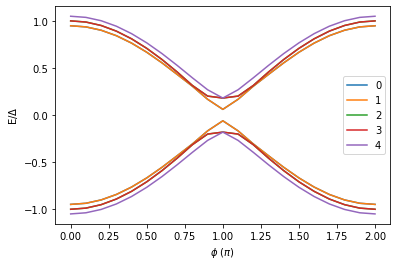

In [33]:
vals = np.linspace(0,2,21)
results = plot_ABS_spectrum(systf2, params_toy, vals, n=5, ph_sym=False,method='block',r=True)

In [70]:
results_mask = energy_operator_mask(systf1, params_TI)
results_block = energy_operator_block(systf1, params_TI)
se_mask_conj = pd.DataFrame(results_mask[0].conj())
sh_mask = pd.DataFrame(results_mask[1])
se_block = pd.DataFrame(results_block[0])
sh_block_conj = pd.DataFrame(results_block[1].conj())

In [71]:
se_mask_conj

,0,1,2,3
0,0.00+0.00j,0.00+0.00j,0.31-0.71j,-0.40+0.49j
1,0.00-0.00j,0.00-0.00j,0.07+0.63j,-0.12+0.76j
2,-0.31+0.71j,-0.07-0.63j,-0.00+0.00j,0.00-0.00j
3,0.40-0.49j,0.12-0.76j,-0.00-0.00j,-0.00-0.00j


In [72]:
sh_mask

,0,1,2,3
0,0.00+0.00j,0.00+0.00j,0.31-0.71j,-0.40+0.49j
1,0.00-0.00j,0.00-0.00j,0.07+0.63j,-0.12+0.76j
2,-0.31+0.71j,-0.07-0.63j,-0.00+0.00j,-0.00+0.00j
3,0.40-0.49j,0.12-0.76j,-0.00-0.00j,0.00-0.00j
